#                        Heart Disease prediction using SVC

# Load dataset

In [66]:
import pandas as pd

In [67]:
data=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\DS_Projects\\heart.xls')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Analysing the Dataset

In [68]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
X=data.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [70]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# scaling the datas

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)
x_scaler

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# Spliting to training and testing sets

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=1)

In [74]:
X_train.shape,y_train.shape

((212, 13), (212,))

In [75]:
X_test.shape,y_test.shape

((91, 13), (91,))

# Importing Support vector classifier

In [76]:
from sklearn.svm import SVC
model=SVC(kernel='poly')
model.fit(X_train,y_train)

SVC(kernel='poly')

In [77]:
y_predict=model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [78]:
y_test.values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

# Checking the Accuracy and Report

In [79]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict)*100)

80.21978021978022


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



# Generating Confusion matrix

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
cm=confusion_matrix(y_test,y_predict)

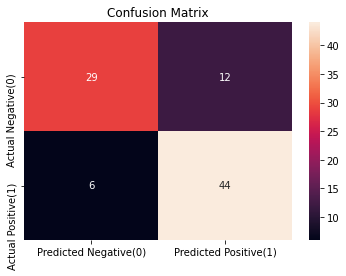

In [83]:
sns.heatmap(cm,fmt='d',annot=True,xticklabels=['Predicted Negative(0)','Predicted Positive(1)'],yticklabels=['Actual Negative(0)','Actual Positive(1)'])
plt.title("Confusion Matrix")
plt.show()

# Predicting with new values

In [84]:
y_new=model.predict(scaler.transform([[53,1,2,125,210,1,1,132,0,2.5,0,1,0]]))
if y_new==1:
    print("Suffers Heart issues")
else:
    print("Don't suffer Heart issues")

Don't suffer Heart issues


# Prediction using KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
y_predicts=knn.predict(X_test)
y_predicts

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [88]:
y_test.values

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict)*100)

80.21978021978022
